<p style="color:yellow;"><strong>This cell must be run first always to import necessary libraries and modules and set up the environment along with setting seed for reproducibility.</strong></p>


In [24]:
import numpy as np
np.random.seed(42)
from train_fashion_10 import train as fashion_train
from train_cifar_10 import train as cifar_train

The following 2 blocks allow for self training and is stated in each cell how long the training approximately takes. Further down there are cells made to test on the saved models which reproduce our finals results from the report.

--------------

# Fashion-MNIST Run

### Takes about 11 minutes to run on a standard laptop

```python

In [ ]:
from types import SimpleNamespace
import os
os.environ["WANDB_MODE"] = "disabled"
!wandb disabled

def train_notebook(config):
    """
    Notebook-friendly wrapper for training.
    `config` is a dictionary of parameters, similar to your params dict.
    """
    # Convert dict to a SimpleNamespace to mimic argparse.Namespace
    args = SimpleNamespace(**config)
    params['hidden_layers'] = ','.join(map(str, params['hidden_layers']))
#     # Convert hidden_layers from string to list if necessary
    if isinstance(args.hidden_layers, str):
        args.hidden_layers = [int(x.strip()) for x in args.hidden_layers.split(',')]
    
    return fashion_train(args=args)

params = {
        'num_epochs': 100,
        'dropout_rate': 0.3,
        'learning_rate': 0.00012467720929682245,
        'l2_coeff': 0.0000153103741917564,
        'hidden_layers': [1024, 512, 256],   # can be string or list
        'weight_init': 'random',
        'optimizer': 'adam',
        'activation': 'relu',
        'batch_size': 128,
        'input_size': 784,
        'loss': 'cross_entropy',
        'batch_norm': True,
        'standardize': True,
        'use_subset': False,
        'subset_ratio': 0.25,
        'project_name': 'Deep_learning_project',
        'experiment_name': 'Fashion_Notebook_Run',
        'no_wandb': False,
        'no_plots': False,
        'save_plots': 'Plots'
        }


train_notebook(params)

# Cifar-10 Run
### Takes about 19 minutes to run

In [ ]:
from types import SimpleNamespace
import os
os.environ["WANDB_MODE"] = "disabled"
!wandb disabled

def train_notebook(config):
    """
    Notebook-friendly wrapper for training.
    `config` is a dictionary of parameters, similar to your params dict.
    """
    # Convert dict to a SimpleNamespace to mimic argparse.Namespace
    args = SimpleNamespace(**config)
    params['hidden_layers'] = ','.join(map(str, params['hidden_layers']))
#     # Convert hidden_layers from string to list if necessary
    if isinstance(args.hidden_layers, str):
        args.hidden_layers = [int(x.strip()) for x in args.hidden_layers.split(',')]
    
    return cifar_train(args=args)

params = {
        'num_epochs': 100,
        'dropout_rate': 0.5,
        'learning_rate': 0.00030361363933609274,
        'l2_coeff': 0.0016688987469551863,
        'hidden_layers': [1024, 512, 256],   # can be string or list
        'weight_init': 'random',
        'optimizer': 'adam',
        'activation': 'relu',
        'batch_size': 128,
        'input_size': 3072,
        'loss': 'cross_entropy',
        'batch_norm': True,
        'standardize': True,
        'use_subset': False,
        'subset_ratio': 0.25,
        'project_name': 'Deep_learning_project',
        'experiment_name': 'Cifar_notebook_Run',
        'no_wandb': False,
        'no_plots': False,
        'save_plots': 'Plots'
        }


train_notebook(params)

-----------------------------

## FASHION-MNIST trained model


Model loaded from ../models/fashion_model_best.pkl
Loaded with manual parameters

TEST RESULTS
Test Accuracy: 0.8960 (89.60%)
Test Loss: 0.3636
Evaluation time: 1.13 seconds
Total test samples: 10000

TEST RESULTS
Test Accuracy: 0.8960 (89.60%)
Test Loss: 0.3636
Evaluation time: 1.13 seconds
Total test samples: 10000


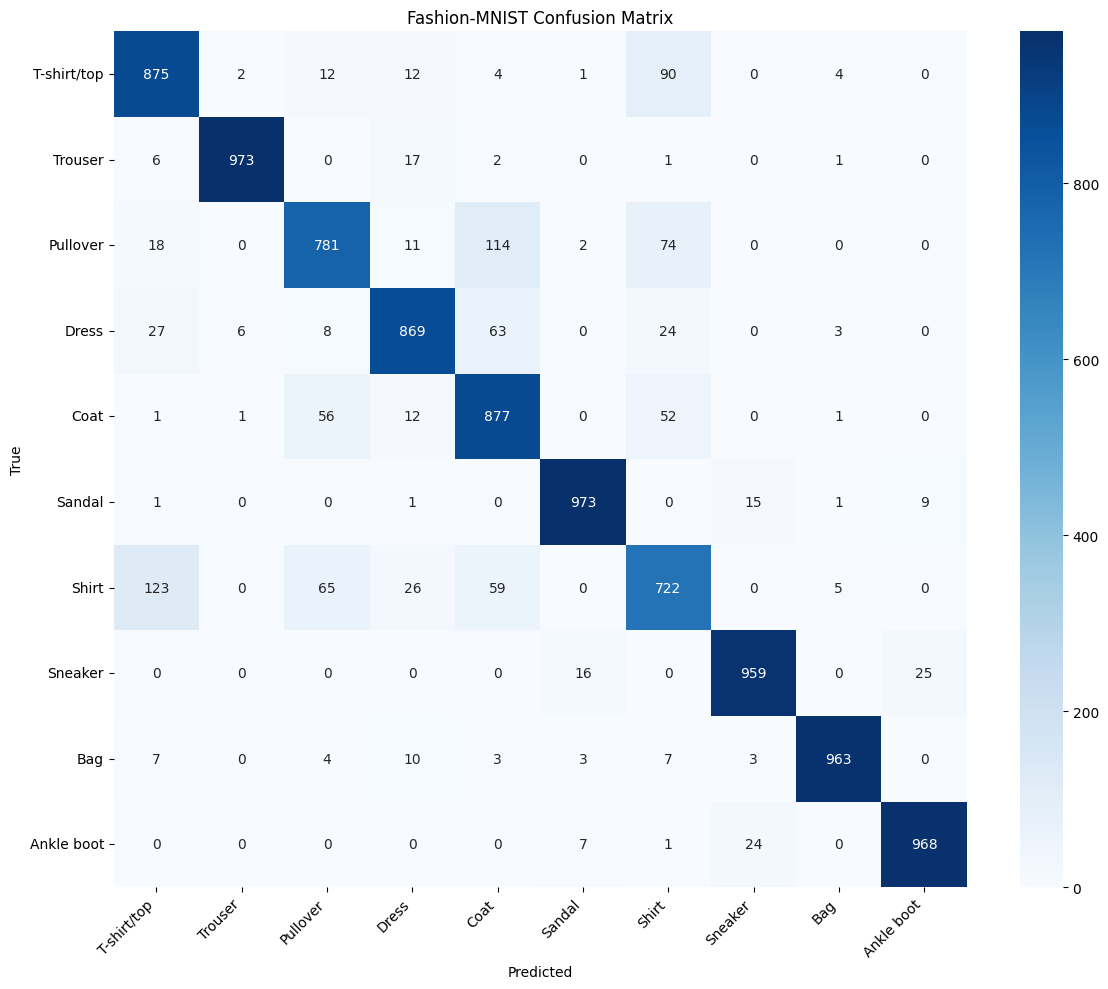

None


In [ ]:
# Import and reload the updated model
import numpy as np
np.random.seed(42)


from model_cifar_10 import FFNN
from types import SimpleNamespace
from test_fashion_10 import test_model as fashion_test

# Load the model directly

fashion_test(args=SimpleNamespace(
    model_path='../models/fashion_model_best.pkl',
    output_dir='test_results',
    batch_size=1000,
    standardize=True,
    confusion_matrix=True))

## 10 unique images from the test set with predicted and true labels

Model loaded from ../models/fashionmodel.pkl


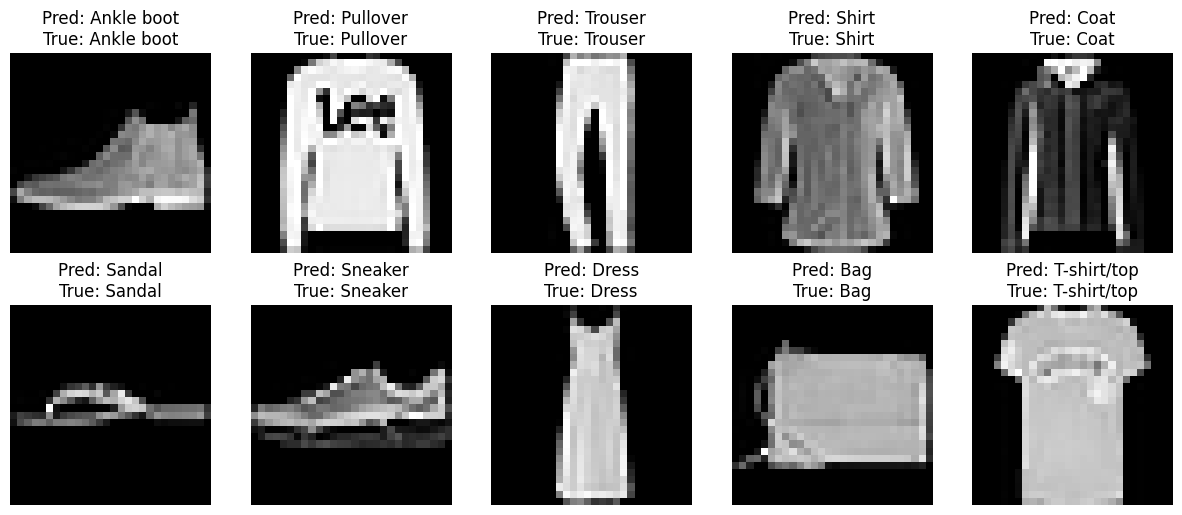

In [2]:
# Show predictions on 10 unique test images
import matplotlib.pyplot as plt
import numpy as np
from load_data import DataLoaderFashionMNIST
np.random.seed(42)
model = FFNN.load_model('../models/fashionmodel.pkl')

class_labels = DataLoaderFashionMNIST().get_class_names()
# Load test data
data_loader = DataLoaderFashionMNIST()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = data_loader.get_data()
# Get 1 of each unique test images
unique_images = []
unique_labels = []
seen_labels = set()
for img, label in zip(X_test, y_test):
    if label not in seen_labels:
        unique_images.append(img)
        unique_labels.append(label)
        seen_labels.add(label)
    if len(seen_labels) == 10:
        break
unique_images = np.array(unique_images)
unique_labels = np.array(unique_labels)

# Make predictions
predictions = model.predict(unique_images)
# 
# Plot the images and predictions using class labels
    
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(unique_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_labels[predictions[i]]}\nTrue: {class_labels[unique_labels[i]]}")
    plt.axis('off')
plt.show()

CIFAR-10 trained model

Model loaded from ../models/cifar_model_best.pkl
Loaded with manual parameters

TEST RESULTS
Test Accuracy: 0.5524 (55.24%)
Test Loss: 1.6442
Evaluation time: 1.51 seconds
Total test samples: 10000

TEST RESULTS
Test Accuracy: 0.5524 (55.24%)
Test Loss: 1.6442
Evaluation time: 1.51 seconds
Total test samples: 10000


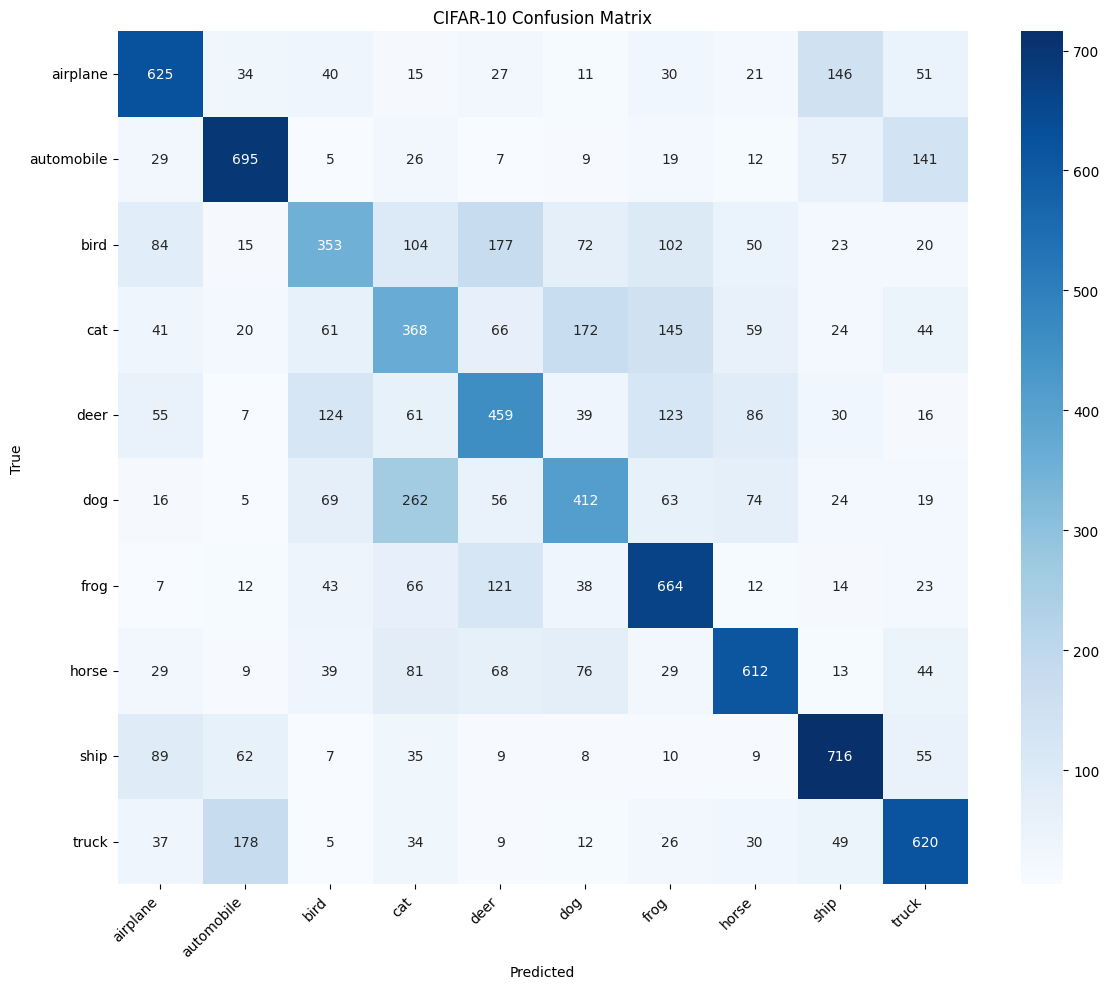

In [3]:
# Import and reload the updated model
import numpy as np
np.random.seed(42)


from model_cifar_10 import FFNN
from types import SimpleNamespace
from test_cifar_10 import test_model as cifar_test

# Load the model directly

cifar_test(args=SimpleNamespace(
    model_path='../models/cifar_model_best.pkl',
    output_dir='test_results',
    batch_size=1000,
    standardize=True,
    confusion_matrix=True))

### Visualization of 10 images from the test set with predicted and true labels

Model loaded from ../models/cifarmodel.pkl


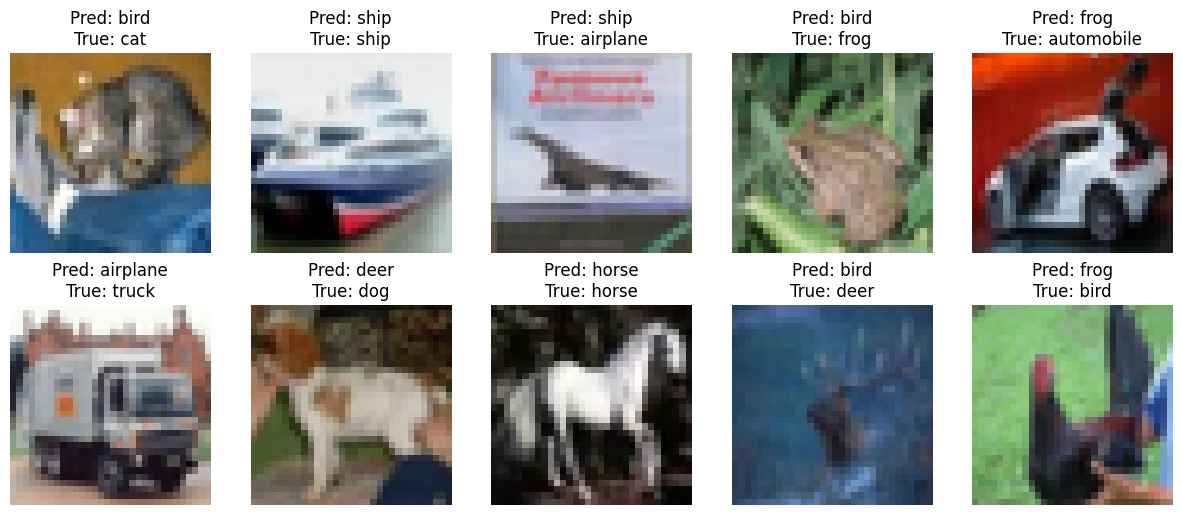

In [4]:
# Show predictions on 10 unique test images
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
model = FFNN.load_model('../models/cifarmodel.pkl')
from load_data import DataLoaderCifar10
class_labels = DataLoaderCifar10().get_class_names()
# Load test data
data_loader = DataLoaderCifar10()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = data_loader.get_formatted_data()
# Get 10 unique test images
unique_images = []
unique_labels = []
seen_labels = set()
for img, label in zip(X_test, y_test):
    if label not in seen_labels:
        unique_images.append(img)
        unique_labels.append(label)
        seen_labels.add(label)
    if len(seen_labels) == 10:
        break
unique_images = np.array(unique_images)
unique_labels = np.array(unique_labels)

# Make predictions
predictions = model.predict(unique_images)

# Plot the images and predictions using class labels
    
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(unique_images[i].reshape(32, 32, 3))
    plt.title(f"Pred: {class_labels[predictions[i]]}\nTrue: {class_labels[unique_labels[i]]}")
    plt.axis('off')
plt.show()